In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import model_from_json, load_model
from sklearn.model_selection import train_test_split
import sklearn
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

import cv2

with open('model_arch.json', 'r') as json_file:
    loaded_model_json = json_file.read()
model = model_from_json(loaded_model_json)


model.load_weights('weights.h5')





# Load npz file containing image arrays
fake_dataset = np.load('fake.npz')
real_dataset = np.load('real.npz')
dataset = list(real_dataset['x'])
dataset.extend(list(fake_dataset['x']))

x= np.array(dataset)

new_image_size=(50, 333)
x = (x * 255).astype(np.uint8)

x = np.array([cv2.resize(img, new_image_size) for img in x])


lable_list={}
lable_list["fake"] = 0
lable_list["real"] = 1
labels = [lable_list["real"]] * len(real_dataset['x'])
labels.extend([lable_list["fake"]] * len(fake_dataset['x']))
y= np.array(labels)





X_train, X_valtest, y_train, y_valtest = train_test_split(x,y, test_size=0.2, random_state=1, stratify=y)

# Second split the 20% into validation and test sets
X_test, X_val, y_test, y_val = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=1, stratify=y_valtest)




a= np.expand_dims(X_train, axis=-1)
x_train = np.repeat(a, 3, axis=-1)

a1= np.expand_dims(X_test, axis=-1)
X_test = np.repeat(a1, 3, axis=-1)
    
    
a2= np.expand_dims(X_valtest, axis=-1)
X_valtest= np.repeat(a2, 3, axis=-1)

print(x_train.shape)




C:\Users\En.Yara\AppData\Local\Temp\ipykernel_18136\4019291946.py:36: RuntimeWarning: overflow encountered in multiply
  x = (x * 255).astype(np.uint8)


(1200, 333, 50, 3)


(300, 333, 50, 3)
10/10 [==============================] - 7s 732ms/step


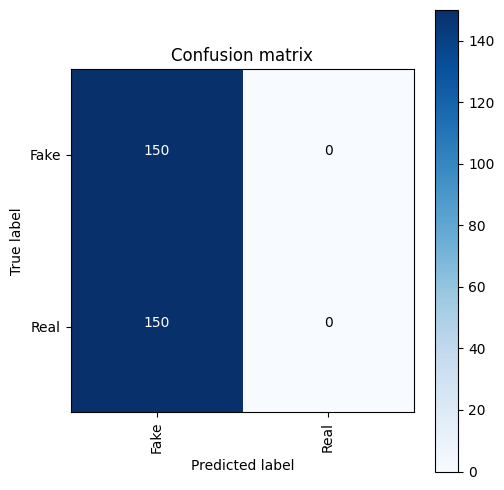

In [19]:
dict_characters = {0: 'Fake', 1: 'Real'}
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
a=X_train
b=y_train
print(X_valtest.shape)
c=X_valtest
d=y_valtest
Y_pred = model.predict(c)
Y_pred_classes = np.argmax(Y_pred,axis=1) 
confusion_mtx = confusion_matrix(d, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values()))

InvalidArgumentError: Graph execution error:

Detected at node 'sequential/conv2d/BiasAdd' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "C:\Users\En.Yara\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "C:\Users\En.Yara\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance
      app.start()
    File "C:\Users\En.Yara\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start
      self.io_loop.start()
    File "c:\Python311\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "c:\Python311\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "c:\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once
      handle._run()
    File "c:\Python311\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\En.Yara\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue
      await self.process_one()
    File "C:\Users\En.Yara\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 534, in process_one
      await dispatch(*args)
    File "C:\Users\En.Yara\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
      await result
    File "C:\Users\En.Yara\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 359, in execute_request
      await super().execute_request(stream, ident, parent)
    File "C:\Users\En.Yara\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 778, in execute_request
      reply_content = await reply_content
    File "C:\Users\En.Yara\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 446, in do_execute
      res = shell.run_cell(
    File "C:\Users\En.Yara\AppData\Roaming\Python\Python311\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\En.Yara\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell
      result = self._run_cell(
    File "C:\Users\En.Yara\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell
      result = runner(coro)
    File "C:\Users\En.Yara\AppData\Roaming\Python\Python311\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\En.Yara\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\En.Yara\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\En.Yara\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\En.Yara\AppData\Local\Temp\ipykernel_18136\243565843.py", line 1, in <module>
      Y_pred = model.predict(X_test[0])
    File "C:\Users\En.Yara\AppData\Roaming\Python\Python311\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\En.Yara\AppData\Roaming\Python\Python311\site-packages\keras\engine\training.py", line 2382, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Users\En.Yara\AppData\Roaming\Python\Python311\site-packages\keras\engine\training.py", line 2169, in predict_function
      return step_function(self, iterator)
    File "C:\Users\En.Yara\AppData\Roaming\Python\Python311\site-packages\keras\engine\training.py", line 2155, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\En.Yara\AppData\Roaming\Python\Python311\site-packages\keras\engine\training.py", line 2143, in run_step
      outputs = model.predict_step(data)
    File "C:\Users\En.Yara\AppData\Roaming\Python\Python311\site-packages\keras\engine\training.py", line 2111, in predict_step
      return self(x, training=False)
    File "C:\Users\En.Yara\AppData\Roaming\Python\Python311\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\En.Yara\AppData\Roaming\Python\Python311\site-packages\keras\engine\training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\En.Yara\AppData\Roaming\Python\Python311\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\En.Yara\AppData\Roaming\Python\Python311\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\En.Yara\AppData\Roaming\Python\Python311\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\En.Yara\AppData\Roaming\Python\Python311\site-packages\keras\engine\sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\En.Yara\AppData\Roaming\Python\Python311\site-packages\keras\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\En.Yara\AppData\Roaming\Python\Python311\site-packages\keras\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\En.Yara\AppData\Roaming\Python\Python311\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\En.Yara\AppData\Roaming\Python\Python311\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\En.Yara\AppData\Roaming\Python\Python311\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\En.Yara\AppData\Roaming\Python\Python311\site-packages\keras\layers\convolutional\base_conv.py", line 311, in call
      outputs = tf.nn.bias_add(
Node: 'sequential/conv2d/BiasAdd'
convolution input must be 4-dimensional: [32,50,3]
	 [[{{node sequential/conv2d/BiasAdd}}]] [Op:__inference_predict_function_1364]